In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from pathlib import Path, PureWindowsPath
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

In [7]:
os.chdir(os.path.dirname(os.getcwd()))

In [8]:
path = PureWindowsPath(os.getcwd() + "\\data\\input\\data.parquet")
path = path.as_posix()
corpus = pd.read_parquet(path) #engine="fastparquet"
# corpus = pd.read_parquet(os.path.dirname(path), engine="fastparquet")
corpus["id"] = list(range(len(corpus)))
corpus = corpus.sort_values("id")
print(corpus.id.duplicated().any()) #Verifier qu'il n'y a pas d'id en doublon
print(corpus.index.duplicated().any())
corpus

False
False


id                                                      message  \
index                                                                      
0         0    1. [Le pédobaptême vs. la Didaché ? – PAR LA FOI](http...   
1         1    5. Voir WARFIELD, B.B., _Selected Shorter Writings_ , ...   
2         2  Et désolé Marty, mais le voyage dans le temps ne semble ...   
3         3  Ce ne sont pas les supers-évangélistes qui crient depuis...   
4         4  > Objection 3 : Il semble bien que l’imagination humaine...   
...     ...                                                          ...   
8219   4644  [Vindiciae foederis of a vindication of the interest tha...   
8220   4645  Pour qu’il y ait une contradiction dans la volonté, il f...   
8222   4646  Le problème de ces deux approches est qu’elles convienne...   
8226   4647  ## Article 3: Peut-on dire que les créatures ressemblent...   
8227   4648  Dire que Dieu veut un bien plus grand pour un que pour l...   

                                              message_preprocessed  \
index                                                                
0      pédobaptême vs didaché – foihttpsparlafoiblogwordpressco...   
1      voir warfield bb selected shorter writings phillipsburg ...   
2       désolé marty voyage temps semble pouvoir marcher condition   
3                    supers-évangélistes crient depuis boîte savon   
4      objection semble bien imagination humaine puisse percevo...   
...                                                            ...   
8219   vindiciae foederis of a vindication of the interest that...   
8220                                contradiction volonté faudrait   
8222   problème deux approche elles conviennent mouvement extér...   
8226                article peut-on dire créature ressemblent dieu   
8227   dire dieu veut bien plus grand autre exemple veut capaci...   

         category  length  category_bin  
index                                    
0         baptism     239             0  
1      philosophy      91             1  
2      philosophy      97             1  
3      philosophy      75             1  
4      philosophy     561             1  
...           ...     ...           ...  
8219      baptism     152             0  
8220   philosophy      77             1  
8222   philosophy     335             1  
8226   philosophy      65             1  
8227   philosophy     293             1  

[4649 rows x 6 columns]

In [3]:
corpus["category"].value_counts()

philosophy    5177
baptism       3051
Name: category, dtype: int64

(0.0, 600.0)

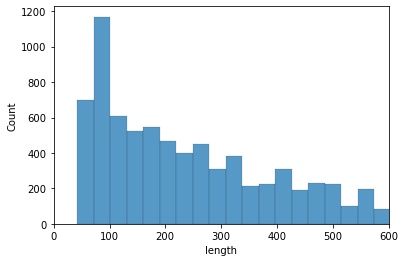

In [5]:
sb.histplot(data=corpus, x="length")
plt.xlim(0, 600)

In [4]:
X = corpus["message_preprocessed"]
y = corpus["category"]
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X)
X_tfidf_np = X_tfidf.toarray()
tfidf_vect.get_feature_names_out()

# Reduction de dimensions pour potentiellement observer des clusters

In [23]:
print("number of dimensions at the beginninig =", X_tfidf.shape)

number of dimensions at the beginninig = (8228, 12950)


TruncatedSVD

In [131]:
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
X_tfidf_svd = svd.fit_transform(X_tfidf)

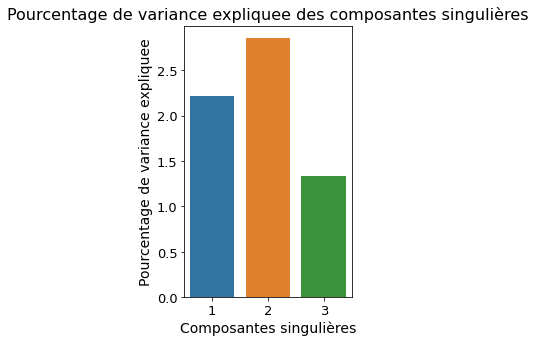

In [58]:
# Pourcentage de variance expliquee des composantes singulieres
df_explained_var = pd.DataFrame(list(zip(range(1, 41), svd.explained_variance_ratio_[:40] * 100)))
sb.barplot(data=df_explained_var, x=0, y=1)
plt.xlabel("Composantes singulières", size=14)
plt.ylabel("Pourcentage de variance expliquee", size=14)
plt.title("Pourcentage de variance expliquee des composantes singulières", size=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.rcParams["figure.figsize"] = (3, 5)

In [136]:
type(X_tfidf_svd[:,2])
X_tfidf_svd[:,2].shape
# X_tfidf_svd[:,2]

(8228,)

In [135]:
corpus["svd_x"] = X_tfidf_svd[:,0]
corpus["svd_y"] = X_tfidf_svd[:,1]
corpus["svd_z"] = X_tfidf_svd[:,2]
corpus["category_int"] = np.select([corpus["category"] == "philosophy"], [1], default=0)
# corpus

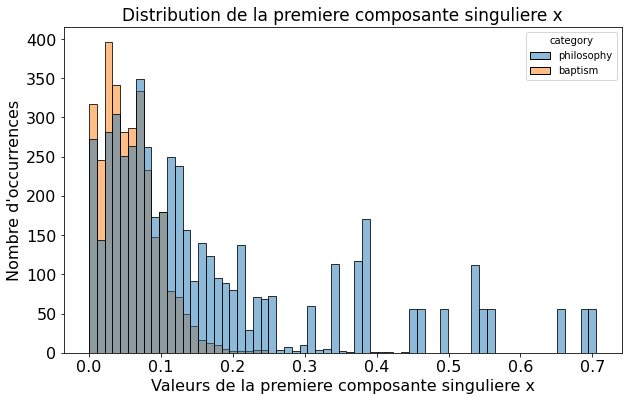

In [62]:
# Distribution des deux composantes singulieres
# Premiere valeur singuliere x
sb.histplot(data=corpus, x="svd_x", hue="category")
plt.xlabel("Valeurs de la premiere composante singuliere x", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la premiere composante singuliere x", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.xlim(0, 0.6)
# plt.savefig(path)
plt.show()

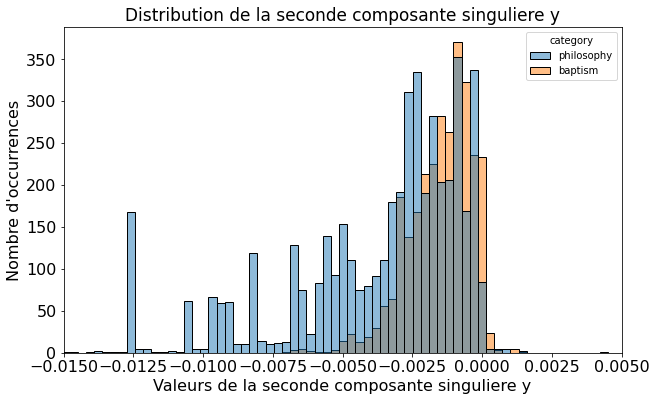

In [63]:
#nouveau
# Distribution des deux composantes singulieres
# Seconde valeur singuliere
# sb.histplot(corpus["svd_2d_y"])
sb.histplot(data=corpus, x="svd_y", hue="category", edgecolor="black", linewidth=1)
plt.xlabel("Valeurs de la seconde composante singuliere y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la seconde composante singuliere y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(-0.015, 0.005)
# plt.savefig(path)
plt.show()

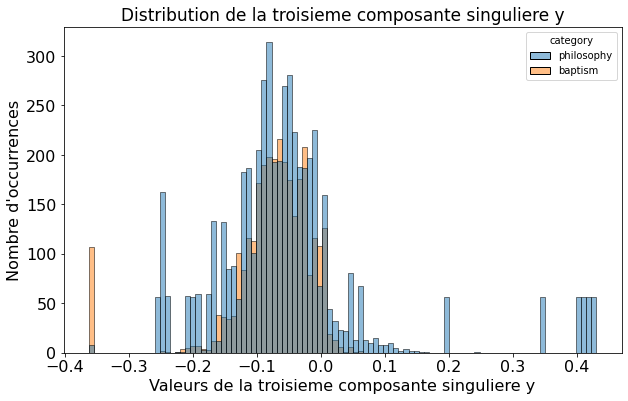

In [65]:
# Distribution des deux composantes singulieres
# Troisieme valeur singuliere
sb.histplot(data=corpus, x="svd_z", hue="category")
plt.xlabel("Valeurs de la troisieme composante singuliere y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la troisieme composante singuliere y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.xlim(-0.015, 0.005)
# plt.savefig(path)
plt.show()

In [169]:
corpus.value_counts("category")

category
philosophy    5177
baptism       3051
dtype: int64

(-0.015, 0.005)

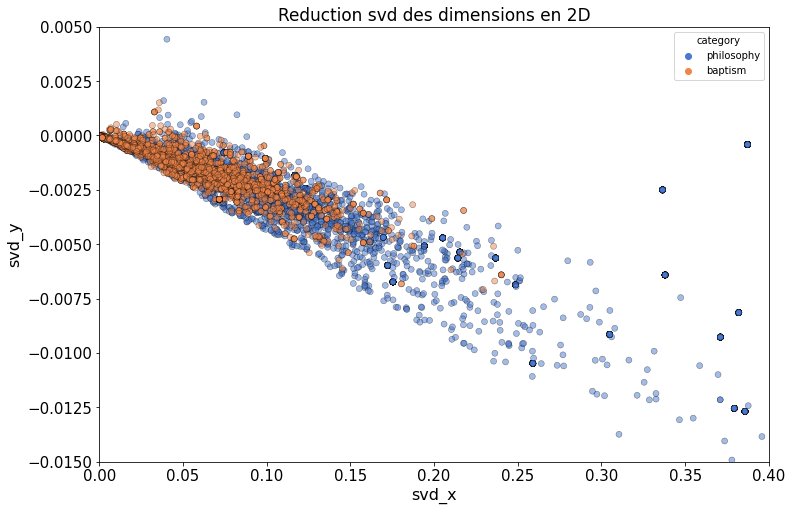

In [69]:
# Plot en 2d du svd
plt.figure(figsize=(12, 8))
sb.scatterplot(
    x="svd_x", y="svd_y",
    hue="category",
    edgecolor="black",
    palette=sb.color_palette("muted", 2),
    data=corpus,
    legend="auto",
    alpha=0.5
)
plt.xlabel("svd_x", size=16)
plt.ylabel("svd_y", size=16)
plt.title("Reduction svd des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 0.4)
plt.ylim(-0.015, 0.005)

(-0.015, 0.005)

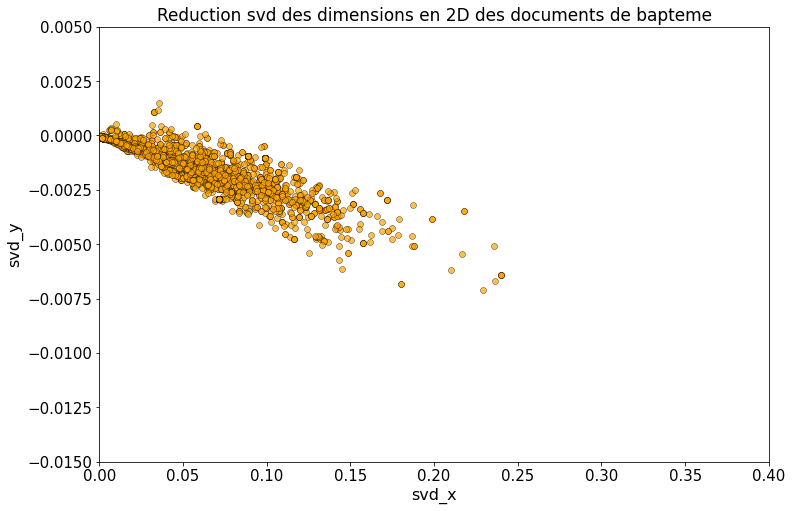

In [70]:
plt.figure(figsize=(12, 8))
sb.scatterplot(
    x="svd_x", y="svd_y",
    palette=sb.color_palette("deep", 1),
    color="orange",
    edgecolor="black",
    data=corpus[corpus["category"] == "baptism"],
    legend="auto",
    alpha=0.7
)
plt.xlabel("svd_x", size=16)
plt.ylabel("svd_y", size=16)
plt.title("Reduction svd des dimensions en 2D des documents de bapteme", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 0.4)
plt.ylim(-0.015, 0.005)

(-0.015, 0.005)

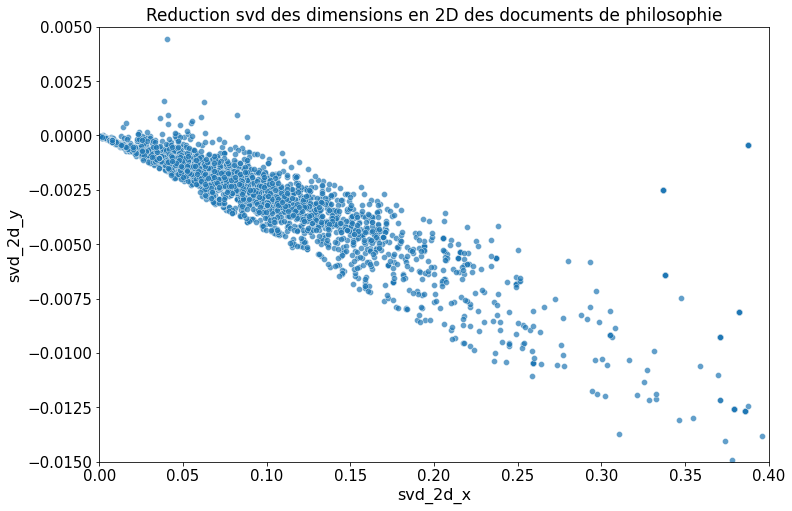

In [187]:
plt.figure(figsize=(12, 8))
sb.scatterplot(
    x="svd_2d_x", y="svd_2d_y",
    palette=sb.color_palette("dark", 2),
    data=corpus[corpus["category"] == "philosophy"],
    legend="auto",
    alpha=0.7
)
plt.xlabel("svd_2d_x", size=16)
plt.ylabel("svd_2d_y", size=16)
plt.title("Reduction svd des dimensions en 2D des documents de philosophie", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 0.4)
plt.ylim(-0.015, 0.005)

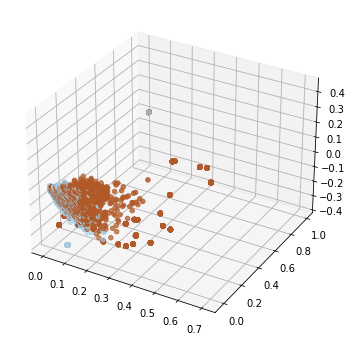

In [71]:
ax = plt.axes(projection='3d')
ax.scatter3D(corpus["svd_x"], corpus["svd_y"], corpus["svd_z"], c=corpus["category_int"], cmap='Paired');


In [72]:
import plotly.express as px
fig = px.scatter_3d(corpus, x='svd_x', y='svd_y', z='svd_z',
              color='category')
fig.show()

AttributeError: 'AxesSubplot' object has no attribute 'set_zlabel'

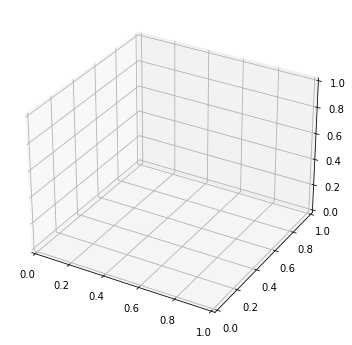

In [205]:
# Plot en 3d du svd
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# fig = plt.figure()
plt.ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("svd_2d_x")
ax.set_ylabel("svd_2d_y")
ax.set_zlabel("svd_2d_z")
# plt.title("Reduction svd des dimensions en 3D", size=17)
ax.scatter(corpus["svd_2d_x"], corpus["svd_2d_y"], corpus["svd_2d_z"])

# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.xlim(0, 0.4)
# plt.ylim(-0.015, 0.005)

TSNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8228 samples in 0.001s...
[t-SNE] Computed neighbors for 8228 samples in 0.409s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8228
[t-SNE] Computed conditional probabilities for sample 2000 / 8228
[t-SNE] Computed conditional probabilities for sample 3000 / 8228
[t-SNE] Computed conditional probabilities for sample 4000 / 8228
[t-SNE] Computed conditional probabilities for sample 5000 / 8228
[t-SNE] Computed conditional probabilities for sample 6000 / 8228
[t-SNE] Computed conditional probabilities for sample 7000 / 8228
[t-SNE] Computed conditional probabilities for sample 8000 / 8228
[t-SNE] Computed conditional probabilities for sample 8228 / 8228
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.282990
[t-SNE] KL divergence after 1000 iterations: 0.872637


(array([-150.0000, -100.0000, -50.0000, 0.0000, 50.0000, 100.0000,
        150.0000]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

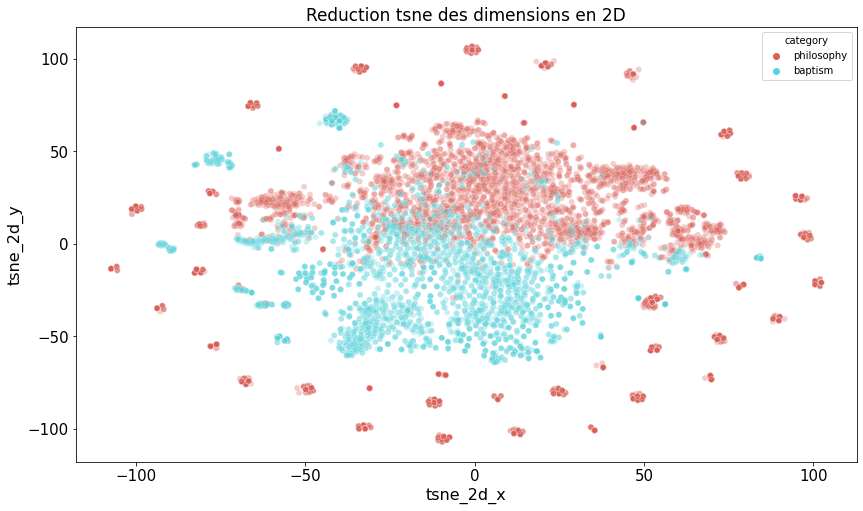

In [91]:
#TSNE en 2D apres reduction svd en 50 dimensions
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
X_tfidf_svd = svd.fit_transform(X_tfidf)
X_tfidf_svd = pd.DataFrame(X_tfidf_svd)
# X_tfidf_svd["category"] = corpus["category"]
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, verbose=1)
tsne_results = tsne.fit_transform(X_tfidf_svd)
corpus["tsne_x"] = tsne_results[:,0]
corpus["tsne_y"] = tsne_results[:,1]

(array([-150.0000, -100.0000, -50.0000, 0.0000, 50.0000, 100.0000,
        150.0000]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

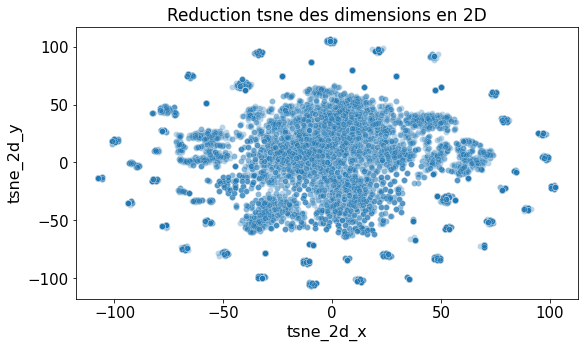

In [116]:
# Sans label
plt.figure(figsize=(9, 5))
sb.scatterplot(
    x="tsne_x", y="tsne_y",
    palette=sb.color_palette("hls", 2),
    data=corpus,
    legend="auto",
    alpha=0.3
)
plt.xlabel("tsne_2d_x", size=16)
plt.ylabel("tsne_2d_y", size=16)
plt.title("Reduction tsne des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([-150.0000, -100.0000, -50.0000, 0.0000, 50.0000, 100.0000,
        150.0000]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

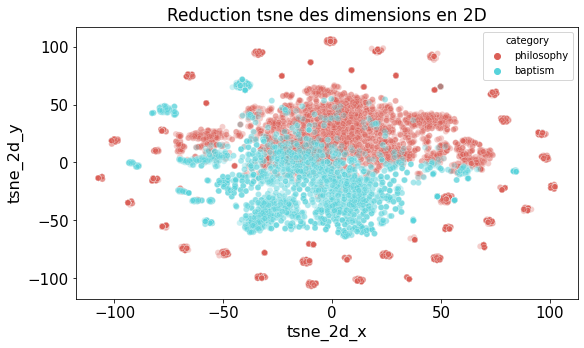

In [115]:
plt.figure(figsize=(9, 5))
sb.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="category",
    palette=sb.color_palette("hls", 2),
    data=corpus,
    legend="auto",
    alpha=0.3
)
plt.xlabel("tsne_2d_x", size=16)
plt.ylabel("tsne_2d_y", size=16)
plt.title("Reduction tsne des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [117]:
#version plotly
# Sans label
fig = px.scatter(corpus, x="tsne_x", y="tsne_y",
                 width=800, height=550)
fig.show()

In [100]:
#version plotly
# Avec label
fig = px.scatter(corpus, x="tsne_x", y="tsne_y", color="category",
                 width=800, height=550)
fig.show()

In [227]:
print("corpus.shape =", corpus.shape)
print("X_tfidf.shape =", X_tfidf.shape)
print("tsne_results.shape =", tsne_results.shape)

corpus.shape = (8228, 12)
X_tfidf.shape = (8228, 12950)
tsne_results.shape = (8228, 2)


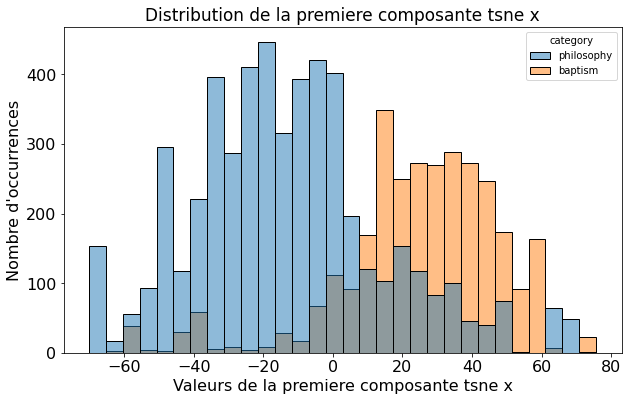

In [279]:
# Distribution des deux composantes tsne
# Premiere composante x
sb.histplot(data=corpus, x="tsne_x", hue="category")
plt.xlabel("Valeurs de la premiere composante tsne x", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la premiere composante tsne x", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

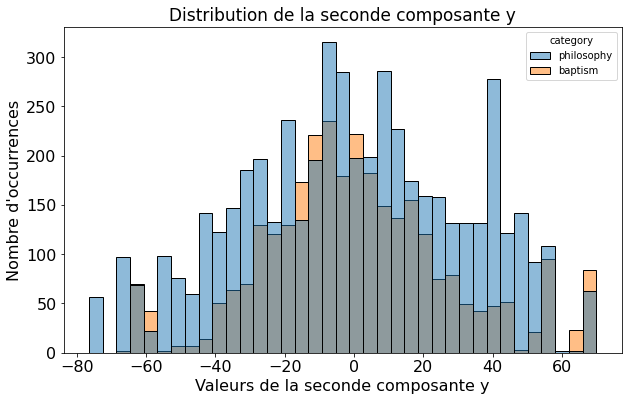

In [280]:
# Distribution des deux composantes singulieres
# Seconde composante singuliere
sb.histplot(data=corpus, x="tsne_y", hue="category")
plt.xlabel("Valeurs de la seconde composante y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la seconde composante y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

In [ ]:
fig = px.scatter(corpus, x="tsne_x", y="tsne_y", color="category",
                 width=800, height=550)
fig.show()

(array([-100.0000, -80.0000, -60.0000, -40.0000, -20.0000, 0.0000, 20.0000,
        40.0000, 60.0000, 80.0000]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

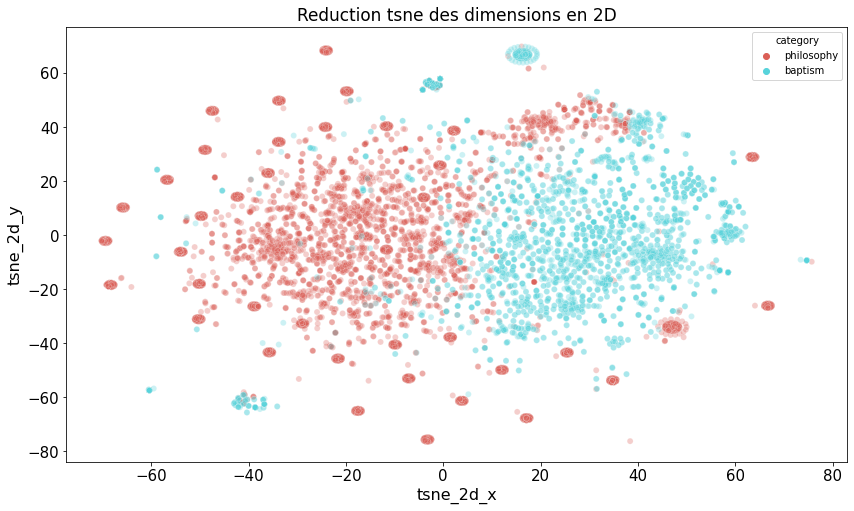

In [252]:
plt.figure(figsize=(14, 8))
sb.scatterplot(
    x="tsne_x", y="tsne_y",
    hue="category",
    palette=sb.color_palette("hls", 2),
    data=corpus,
    legend="auto",
    alpha=0.3
)
plt.xlabel("tsne_2d_x", size=16)
plt.ylabel("tsne_2d_y", size=16)
plt.title("Reduction tsne des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

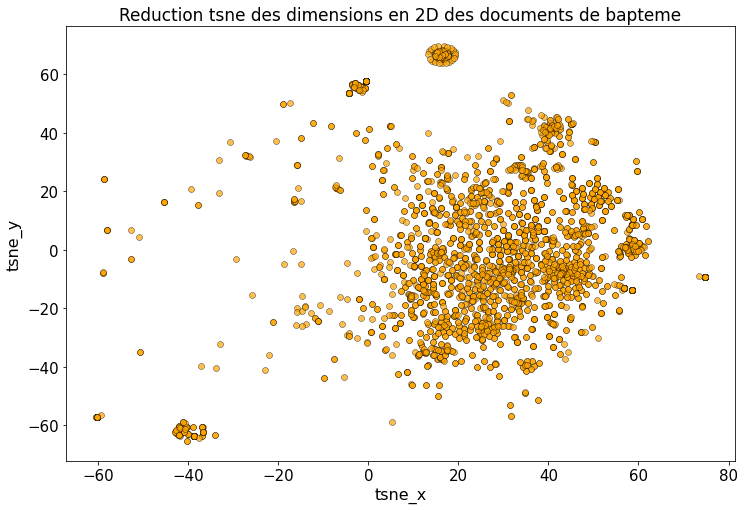

In [239]:
plt.figure(figsize=(12, 8))
sb.scatterplot(
    x="tsne_x", y="tsne_y",
    palette=sb.color_palette("deep", 1),
    color="orange",
    edgecolor="black",
    data=corpus[corpus["category"] == "baptism"],
    legend="auto",
    alpha=0.7
)
plt.xlabel("tsne_x", size=16)
plt.ylabel("tsne_y", size=16)
plt.title("Reduction tsne des dimensions en 2D des documents de bapteme", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

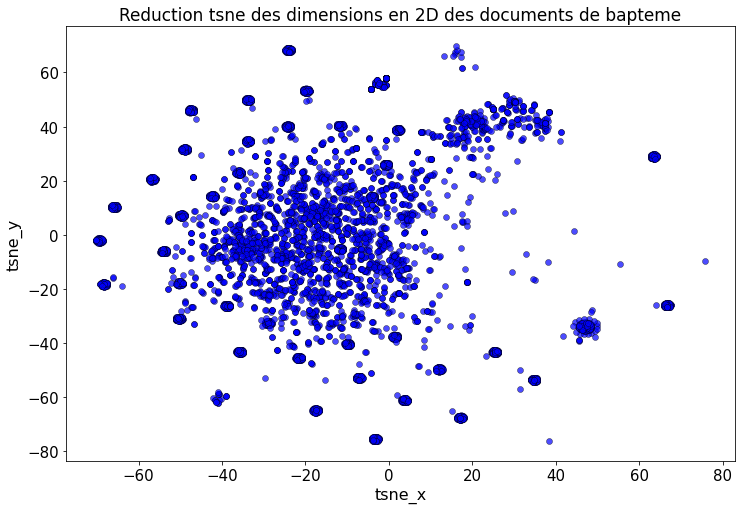

In [241]:
plt.figure(figsize=(12, 8))
sb.scatterplot(
    x="tsne_x", y="tsne_y",
    palette=sb.color_palette("deep", 1),
    color="blue",
    edgecolor="black",
    data=corpus[corpus["category"] == "philosophy"],
    legend="auto",
    alpha=0.7
)
plt.xlabel("tsne_x", size=16)
plt.ylabel("tsne_y", size=16)
plt.title("Reduction tsne des dimensions en 2D des documents de bapteme", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [221]:
#TSNE en 3D
tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=30, verbose=1)
tsne_results = tsne.fit_transform(X_tfidf)
corpus["tsne_x"] = tsne_results[:,0]
corpus["tsne_y"] = tsne_results[:,1]
corpus["tsne_z"] = tsne_results[:,2]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8228 samples in 0.002s...
[t-SNE] Computed neighbors for 8228 samples in 2.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8228
[t-SNE] Computed conditional probabilities for sample 2000 / 8228
[t-SNE] Computed conditional probabilities for sample 3000 / 8228
[t-SNE] Computed conditional probabilities for sample 4000 / 8228
[t-SNE] Computed conditional probabilities for sample 5000 / 8228
[t-SNE] Computed conditional probabilities for sample 6000 / 8228
[t-SNE] Computed conditional probabilities for sample 7000 / 8228
[t-SNE] Computed conditional probabilities for sample 8000 / 8228
[t-SNE] Computed conditional probabilities for sample 8228 / 8228
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.819527
[t-SNE] KL divergence after 1000 iterations: 1.537164


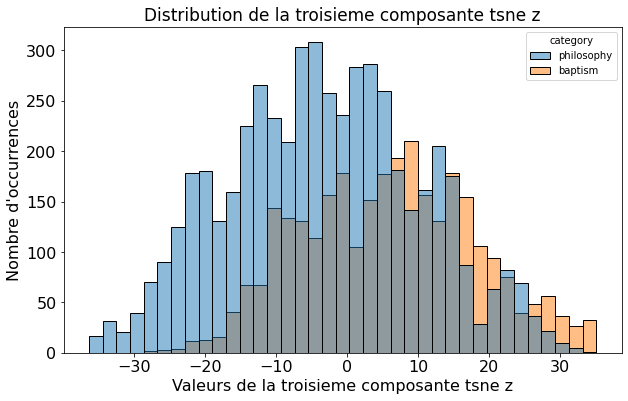

In [284]:
# Distribution des deux composantes tsne
# Troisieme composante z
sb.histplot(data=corpus, x="tsne_z", hue="category")
plt.xlabel("Valeurs de la troisieme composante tsne z", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la troisieme composante tsne z", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

In [223]:
import plotly.express as px
fig = px.scatter_3d(corpus, x='tsne_x', y='tsne_y', z='tsne_z',
              color='category')
fig.show()

UMAP

In [74]:
import umap

In [118]:
#UMAP en 3D
umap_func = umap.UMAP(n_components=3)
umap_results = umap_func.fit_transform(X_tfidf)
corpus["umap_x"] = umap_results[:, 0]
corpus["umap_y"] = umap_results[:, 1]
corpus["umap_z"] = umap_results[:, 2]
print("umap_results.shape =", umap_results)
print("umap_results =", umap_results)

umap_results.shape = [[12.6324 5.1166 8.6051]
 [7.1345 6.4791 -8.0474]
 [14.6027 8.1439 -12.8262]
 ...
 [4.9111 2.3085 6.2278]
 [8.9054 3.7215 4.6894]
 [-2.0520 -13.7961 -3.4020]]
umap_results = [[12.6324 5.1166 8.6051]
 [7.1345 6.4791 -8.0474]
 [14.6027 8.1439 -12.8262]
 ...
 [4.9111 2.3085 6.2278]
 [8.9054 3.7215 4.6894]
 [-2.0520 -13.7961 -3.4020]]


In [119]:
fig = px.histogram(corpus, x="umap_x", color="category",
                 width=700, height=500,)
fig.update_traces(marker_line_width=1,marker_line_color="white")
fig.show() #bizarre verifier pourquoi valeurs changent en fonction du nombre de couleur presente ?

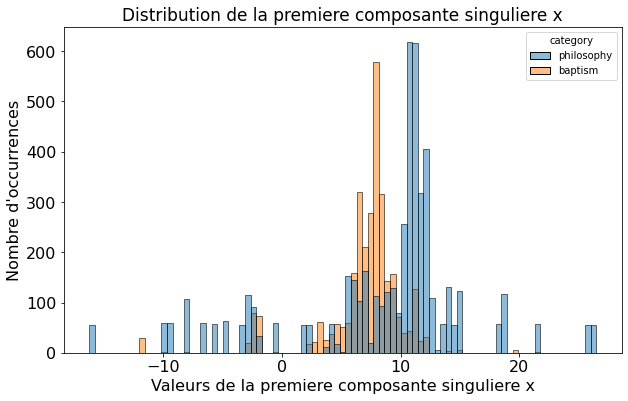

In [120]:
# Distribution des composantes 
# Premiere composante x
sb.histplot(data=corpus, x="umap_x", hue="category")
plt.xlabel("Valeurs de la premiere composante singuliere x", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la premiere composante singuliere x", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

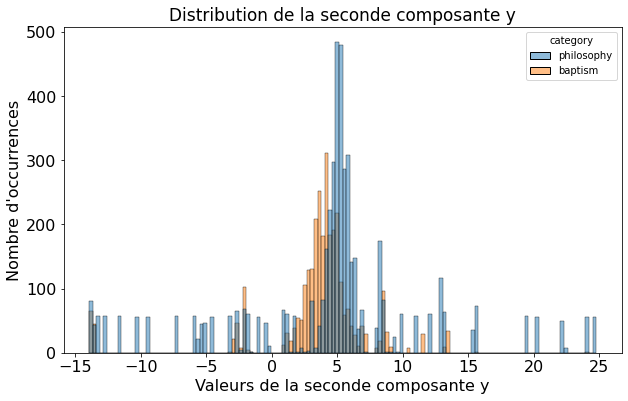

In [121]:
# Seconde composante y
sb.histplot(data=corpus, x="umap_y", hue="category")
plt.xlabel("Valeurs de la seconde composante y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la seconde composante y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

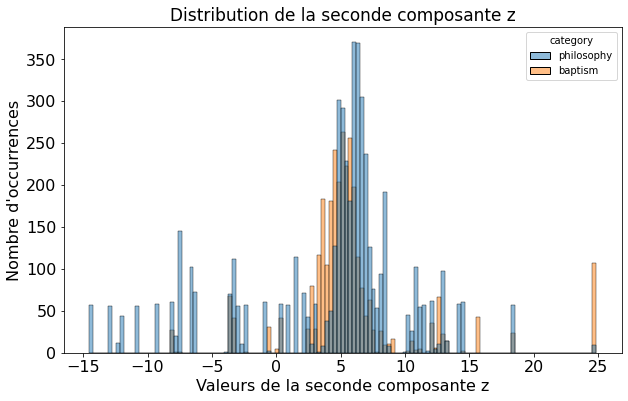

In [122]:
# Troisieme composante z
sb.histplot(data=corpus, x="umap_z", hue="category")
plt.xlabel("Valeurs de la seconde composante z", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la seconde composante z", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

In [123]:
#Plot 3D
import plotly.express as px
fig = px.scatter_3d(corpus, x='umap_x', y='umap_y', z='umap_z',
              color='category')
fig.show()

(array([-20.0000, -15.0000, -10.0000, -5.0000, 0.0000, 5.0000, 10.0000,
        15.0000, 20.0000, 25.0000, 30.0000]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

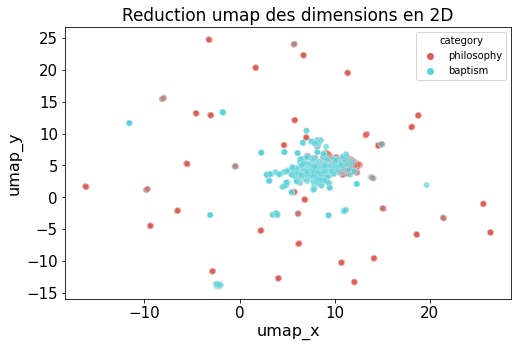

In [124]:
# Plot 2d
plt.figure(figsize=(8, 5))
sb.scatterplot(
    x="umap_x", y="umap_y",
    hue="category",
    palette=sb.color_palette("hls", 2),
    data=corpus,
    legend="auto",
    alpha=0.2
)
plt.xlabel("umap_x", size=16)
plt.ylabel("umap_y", size=16)
plt.title("Reduction umap des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [125]:
# Sans label
fig = px.scatter(corpus, x="umap_x", y="umap_y",
                 width=800, height=550, title="Reduction umap des dimensions en 2D")
fig.show()

In [126]:
# Avec label
fig = px.scatter(corpus, x="umap_x", y="umap_y", color="category",
                 width=800, height=550, title="Reduction umap des dimensions en 2D")
fig.show()

Non-negative matrix factorization

In [7]:
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X_tfidf)
W

array([[0.0315, 0.0000],
       [0.0572, 0.0000],
       [0.0562, 0.0000],
       ...,
       [0.0102, 0.0001],
       [0.0030, 0.0000],
       [0.0000, 0.1592]])

In [8]:
corpus["nmf_x"] = W[:, 0]
corpus["nmf_y"] = W[:, 1]

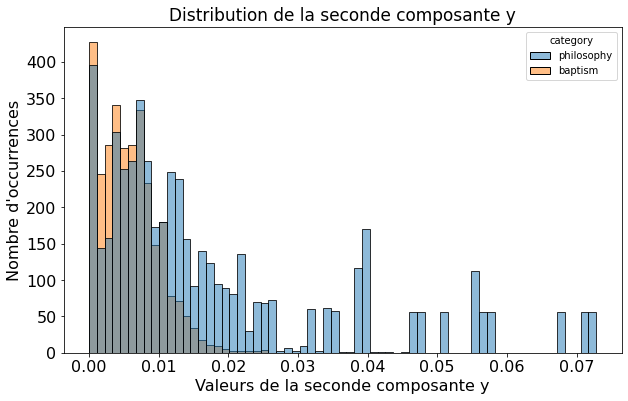

In [11]:
# Distribution des deux composantes nmf
# Premiere composante nmf
sb.histplot(data=corpus, x="nmf_x", hue="category")
plt.xlabel("Valeurs de la premiere composante x", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la premiere composante x", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

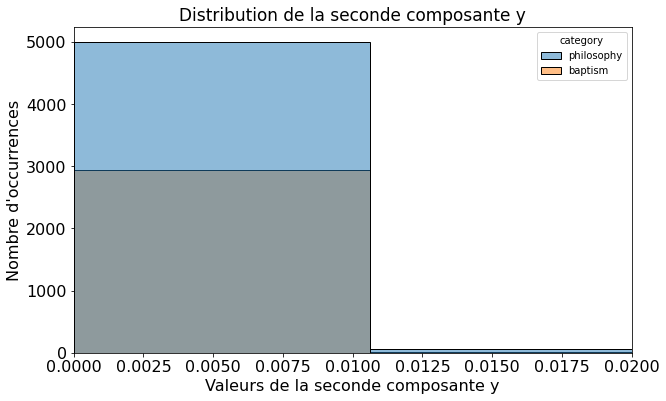

In [17]:
# Distribution des deux composantes nmf
# Seconde composante nmf
sb.histplot(data=corpus, x="nmf_y", hue="category")
plt.xlabel("Valeurs de la seconde composante y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la seconde composante y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 0.02)
# plt.ylim(-0.015, 0.005)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

(0.0, 0.0001)

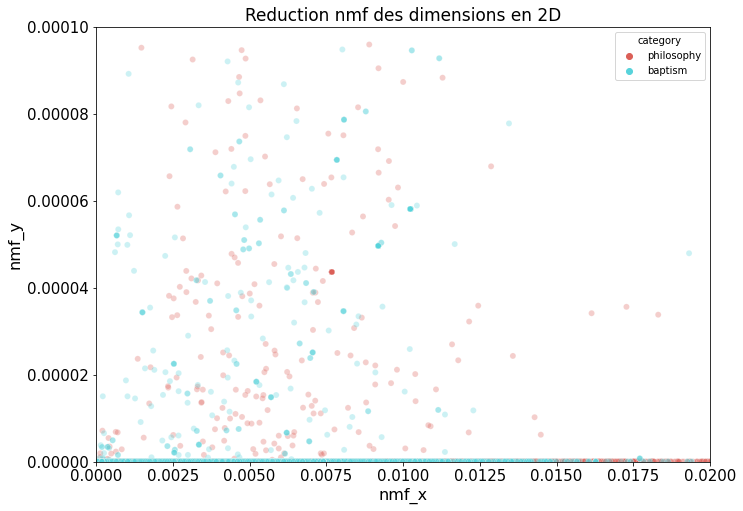

In [24]:
plt.figure(figsize=(11, 8))
sb.scatterplot(
    x="nmf_x", y="nmf_y",
    hue="category",
    palette=sb.color_palette("hls", 2),
    data=corpus,
    legend="auto",
    alpha=0.3
)
plt.xlabel("nmf_x", size=16)
plt.ylabel("nmf_y", size=16)
plt.title("Reduction nmf des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 0.02)
plt.ylim(0, 0.0001)

MiniBatchSparsePCA

In [26]:
X_tfidf.shape

(8228, 12950)

In [33]:
from sklearn.decomposition import MiniBatchSparsePCA
sparsePCA = MiniBatchSparsePCA(n_components=5, random_state=0)
X_sparsePCA = sparsePCA.fit_transform(X_tfidf_np)
X_sparsePCA

array([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       ...,
       [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [39]:
corpus["miniBatchSparsePCA_x"] = X_sparsePCA[:,0]
corpus["miniBatchSparsePCA_y"] = X_sparsePCA[:,1]
corpus["miniBatchSparsePCA_y"].value_counts()

0.0    8228
Name: miniBatchSparsePCA_y, dtype: int64

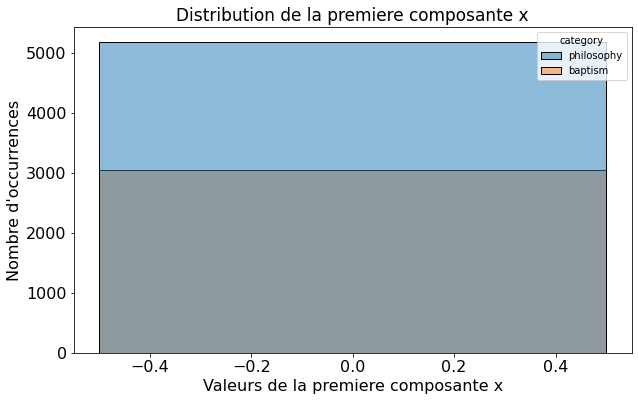

In [35]:
# Distribution des deux composantes sparsePCA
# Premiere composante nmf
sb.histplot(data=corpus, x="miniBatchSparsePCA_x", hue="category")
plt.xlabel("Valeurs de la premiere composante x", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la premiere composante x", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

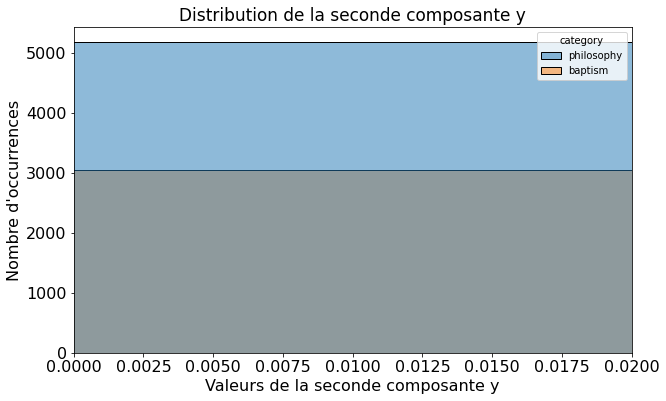

In [37]:
# Distribution des deux composantes sparsePCA
# Seconde composante nmf
sb.histplot(data=corpus, x="miniBatchSparsePCA_y", hue="category")
plt.xlabel("Valeurs de la seconde composante y", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la seconde composante y", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 0.02)
# plt.ylim(-0.015, 0.005)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.savefig(path)
plt.show()

(array([-0.0600, -0.0400, -0.0200, 0.0000, 0.0200, 0.0400, 0.0600]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

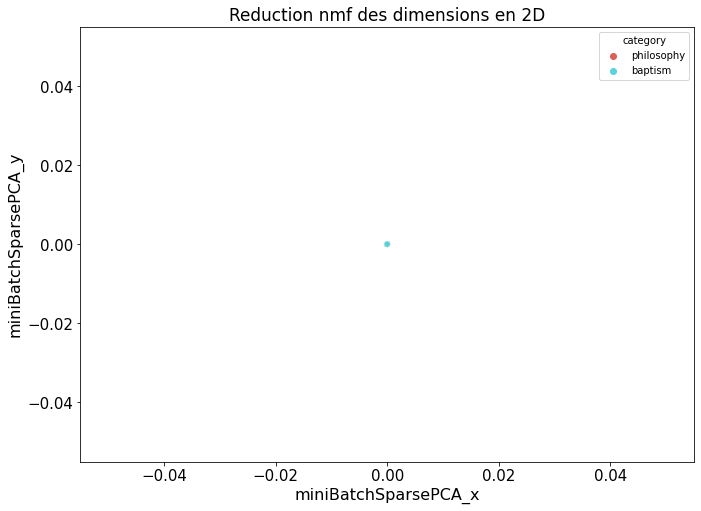

In [41]:
plt.figure(figsize=(11, 8))
sb.scatterplot(
    x="miniBatchSparsePCA_x", y="miniBatchSparsePCA_y",
    hue="category",
    palette=sb.color_palette("hls", 2),
    data=corpus,
    legend="auto",
    alpha=0.3
)
plt.xlabel("miniBatchSparsePCA_x", size=16)
plt.ylabel("miniBatchSparsePCA_y", size=16)
plt.title("Reduction miniBatchSparsePCA des dimensions en 2D", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.xlim(0, 0.02)
# plt.ylim(0, 0.0001)

In [310]:
#Test PCA
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
# data1
pca = PCA(n_components=2)
X = data1.drop("target", axis=1)
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)
X_pca 

array([[-2.6841, 0.3194],
       [-2.7141, -0.1770],
       [-2.8890, -0.1449],
       [-2.7453, -0.3183],
       [-2.7287, 0.3268],
       [-2.2809, 0.7413],
       [-2.8205, -0.0895],
       [-2.6261, 0.1634],
       [-2.8864, -0.5783],
       [-2.6728, -0.1138],
       [-2.5069, 0.6451],
       [-2.6128, 0.0147],
       [-2.7861, -0.2351],
       [-3.2238, -0.5114],
       [-2.6448, 1.1788],
       [-2.3860, 1.3381],
       [-2.6235, 0.8107],
       [-2.6483, 0.3118],
       [-2.1998, 0.8728],
       [-2.5880, 0.5136],
       [-2.3103, 0.3913],
       [-2.5437, 0.4330],
       [-3.2159, 0.1335],
       [-2.3027, 0.0987],
       [-2.3558, -0.0373],
       [-2.5067, -0.1460],
       [-2.4688, 0.1310],
       [-2.5623, 0.3677],
       [-2.6395, 0.3120],
       [-2.6320, -0.1970],
       [-2.5874, -0.2043],
       [-2.4099, 0.4109],
       [-2.6489, 0.8134],
       [-2.5987, 1.0931],
       [-2.6369, -0.1213],
       [-2.8662, 0.0694],
       [-2.6252, 0.5994],
       [-2.8007, 0.2686],

In [306]:
data1[:]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0  

[150 rows x 5 columns]

In [ ]:
# clustering
# 1. K means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X_tfidf)
